# House Price Regression Model

## Loading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV
from yellowbrick.regressor import PredictionError

In [2]:
data = pd.read_json(
    path_or_buf="/kaggle/input/house-json/imoveis.json",
    orient="columns"
)

data

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
...,...,...
73610,"{'customerID': '134148-MJIBCMDQ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73611,"{'customerID': '541465-QBQVXXXZ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73612,"{'customerID': '800542-BZREFTQS', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
73613,"{'customerID': '939419-ECGUNTIH', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."


### Exploring Data

In [3]:
data.ident[0]

{'customerID': '775564-BOJSMVON', 'source': 'Website'}

In [4]:
data.listing[0]

{'types': {'unit': 'Outros', 'usage': 'Residencial'},
 'address': {'city': 'Rio de Janeiro',
  'location': {'lon': -43.413557, 'lat': -22.909429},
  'zone': 'Zona Oeste',
  'neighborhood': 'Taquara'},
 'prices': {'price': '45000', 'tax': {'iptu': '0', 'condo': '150'}},
 'features': {'bedrooms': 0,
  'bathrooms': 0,
  'suites': 0,
  'parkingSpaces': 1,
  'usableAreas': '62',
  'totalAreas': '62',
  'floors': 0,
  'unitsOnTheFloor': 0,
  'unitFloor': 0}}

## Handling Data

### Normalization

In [5]:
data_1 = pd.json_normalize(data.ident)
data_1

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website
...,...,...
73610,134148-MJIBCMDQ,Website
73611,541465-QBQVXXXZ,Website
73612,800542-BZREFTQS,Website
73613,939419-ECGUNTIH,Website


In [6]:
data_2 = pd.json_normalize(data.listing, sep="_")
data_2

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73610,Casa,Residencial,Rio de Janeiro,-43.388906,-23.003960,Zona Oeste,Barra da Tijuca,10000000,2900,2350,5,10,1,4,1024,1024,0,0,0
73611,Casa,Residencial,Rio de Janeiro,-43.395032,-23.000902,Zona Oeste,Barra da Tijuca,10000000,15000,3000,5,7,5,6,750,1250,0,0,0
73612,Apartamento,Residencial,Rio de Janeiro,-43.189682,-22.987018,Zona Sul,Copacabana,10000000,None,None,4,5,4,3,328,328,0,0,0
73613,Casa,Residencial,Rio de Janeiro,-43.351836,-23.005037,Zona Oeste,Barra da Tijuca,10000000,35000,2400,5,10,5,4,1024,1024,0,0,3


### Concating DataFrames

In [7]:
house_data = pd.concat([data_1, data_2], axis=1)
house_data

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73610,134148-MJIBCMDQ,Website,Casa,Residencial,Rio de Janeiro,-43.388906,-23.003960,Zona Oeste,Barra da Tijuca,10000000,...,2350,5,10,1,4,1024,1024,0,0,0
73611,541465-QBQVXXXZ,Website,Casa,Residencial,Rio de Janeiro,-43.395032,-23.000902,Zona Oeste,Barra da Tijuca,10000000,...,3000,5,7,5,6,750,1250,0,0,0
73612,800542-BZREFTQS,Website,Apartamento,Residencial,Rio de Janeiro,-43.189682,-22.987018,Zona Sul,Copacabana,10000000,...,None,4,5,4,3,328,328,0,0,0
73613,939419-ECGUNTIH,Website,Casa,Residencial,Rio de Janeiro,-43.351836,-23.005037,Zona Oeste,Barra da Tijuca,10000000,...,2400,5,10,5,4,1024,1024,0,0,3


In [8]:
# 73615 samples
# 21 features
house_data.shape

(73615, 21)

In [9]:
for col in house_data.columns:
    print(house_data[col].value_counts())
    print('-------------------------------')

customerID
775564-BOJSMVON    1
917809-TRNXMOHE    1
125760-XEXDELYV    1
294183-VCUBOXCU    1
465524-CFDRZTHS    1
                  ..
200525-LDRZXCVM    1
938284-QWFBFUXB    1
882696-YVZSJYMI    1
566032-WFPGBXHL    1
610503-VULDJJZZ    1
Name: count, Length: 73615, dtype: int64
-------------------------------
source
Website    73615
Name: count, dtype: int64
-------------------------------
types_unit
Apartamento    59106
Casa            9389
Outros          5120
Name: count, dtype: int64
-------------------------------
types_usage
Residencial    69596
Comercial       4019
Name: count, dtype: int64
-------------------------------
address_city
Rio de Janeiro        73607
Queimados                 3
São Gonçalo               2
Cachoeirinha              1
São João de Meriti        1
Armação dos Búzios        1
Name: count, dtype: int64
-------------------------------
address_location_lon
-43.365895    399
-43.462590    278
-43.333066    236
-43.383834    232
-43.516473    218
         

## Data Cleaning

### Filter

In [10]:
house_filter = (house_data['types_usage'] == 'Residencial') & (house_data['address_city'] == 'Rio de Janeiro')
filtered_data = house_data[house_filter]
filtered_data

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73610,134148-MJIBCMDQ,Website,Casa,Residencial,Rio de Janeiro,-43.388906,-23.003960,Zona Oeste,Barra da Tijuca,10000000,...,2350,5,10,1,4,1024,1024,0,0,0
73611,541465-QBQVXXXZ,Website,Casa,Residencial,Rio de Janeiro,-43.395032,-23.000902,Zona Oeste,Barra da Tijuca,10000000,...,3000,5,7,5,6,750,1250,0,0,0
73612,800542-BZREFTQS,Website,Apartamento,Residencial,Rio de Janeiro,-43.189682,-22.987018,Zona Sul,Copacabana,10000000,...,None,4,5,4,3,328,328,0,0,0
73613,939419-ECGUNTIH,Website,Casa,Residencial,Rio de Janeiro,-43.351836,-23.005037,Zona Oeste,Barra da Tijuca,10000000,...,2400,5,10,5,4,1024,1024,0,0,3


### Type of variables

In [11]:
# greater indices than rows
# price and iptu as object and not a number (float)
# missing values for some features
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  features_su

In [12]:
filtered_data.reset_index(drop=True, inplace=True)

In [13]:
filtered_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Columns: 21 entries, customerID to features_unitFloor
dtypes: float64(2), int64(7), object(12)
memory usage: 11.1+ MB


In [14]:
filtered_data = filtered_data.astype({
    'prices_price': 'float64',
    'prices_tax_iptu': 'float64',
    'prices_tax_condo': 'float64',
    'features_usableAreas': 'int',
    'features_totalAreas': 'int',
})

filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

## Final Data Handling

### Handling missing values

In [15]:
filtered_data.address_zone.value_counts()

address_zone
Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
                  149
Name: count, dtype: int64

In [16]:
filtered_data['address_zone'] = filtered_data['address_zone'].replace('', np.nan)

In [17]:
filtered_data.address_zone.isnull().sum()

149

In [18]:
dictionary = filtered_data[~filtered_data['address_zone'].isna()].drop_duplicates(subset=['address_neighborhood']).to_dict('records')

In [19]:
zones_dictionary = {dic['address_neighborhood']: dic['address_zone'] for dic in dictionary}
zones_dictionary

{'Taquara': 'Zona Oeste',
 'Santíssimo': 'Zona Oeste',
 'Pedra de Guaratiba': 'Zona Oeste',
 'Recreio dos Bandeirantes': 'Zona Oeste',
 'Guaratiba': 'Zona Oeste',
 'Jacarezinho': 'Zona Norte',
 'Santa Cruz': 'Zona Oeste',
 'Vargem Grande': 'Zona Oeste',
 'Bangu': 'Zona Oeste',
 'Tanque': 'Zona Oeste',
 'Santo Cristo': 'Zona Central',
 'Coelho Neto': 'Zona Norte',
 'Bento Ribeiro': 'Zona Norte',
 'Campo Grande': 'Zona Oeste',
 'Oswaldo Cruz': 'Zona Norte',
 'Camorim': 'Zona Oeste',
 'Sepetiba': 'Zona Oeste',
 'Vigário Geral': 'Zona Norte',
 'Campinho': 'Zona Norte',
 'Realengo': 'Zona Oeste',
 'Jacarepaguá': 'Zona Oeste',
 'Cidade de Deus': 'Zona Oeste',
 'Honório Gurgel': 'Zona Norte',
 'Centro': 'Zona Central',
 'Cosmos': 'Zona Oeste',
 'Tomás Coelho': 'Zona Norte',
 'Cascadura': 'Zona Norte',
 'Pavuna': 'Zona Norte',
 'Paciência': 'Zona Oeste',
 'Praça Seca': 'Zona Oeste',
 'Vila Valqueire': 'Zona Oeste',
 'Inhoaíba': 'Zona Oeste',
 'Vicente de Carvalho': 'Zona Norte',
 'Senador Vasc

In [20]:
for neighborhood, zone in zones_dictionary.items():
    filtered_data.loc[filtered_data['address_neighborhood'] == neighborhood, 'address_zone'] = zone

In [21]:
filtered_data['address_zone'].isnull().sum()

0

In [22]:
filtered_data.prices_tax_iptu.isnull().sum()

8725

In [23]:
filtered_data.prices_tax_condo.isnull().sum()

6061

In [24]:
filtered_data.prices_tax_iptu.fillna(0, inplace=True)
filtered_data.prices_tax_condo.fillna(0, inplace=True)

/tmp/ipykernel_36/2544901187.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_data.prices_tax_iptu.fillna(0, inplace=True)
/tmp/ipykernel_36/2544901187.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [25]:
filtered_data.prices_tax_iptu.isnull().sum(), filtered_data.prices_tax_condo.isnull().sum()

(0, 0)

In [26]:
filtered_data.drop([
    'customerID',
    'source',
    'types_usage',
    'address_city',
    'address_location_lon',
    'address_location_lat',
    'address_neighborhood'
], axis=1, inplace=True)

filtered_data.head()

,types_unit,address_zone,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0


In [27]:
filtered_data.rename({
    'types_unit': 'unit',
    'address_zone': 'zone',
    'prices_price': 'price',
    'prices_tax_iptu': 'tax_iptu',
    'prices_tax_condo': 'tax_condo',
    'features_bedrooms': 'bedrooms',
    'features_bathrooms': 'bathrooms',
    'features_suites': 'suites',
    'features_parkingSpaces': 'parkingSpaces',
    'features_usableAreas': 'usableAreas',
    'features_totalAreas': 'totalAreas',
    'features_floors': 'floors',
    'features_unitsOnTheFloor': 'unitsOnTheFloor',
    'features_unitFloor': 'unitFloor'
}, axis=1, inplace=True)

filtered_data

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69583,Casa,Zona Oeste,10000000.0,2900.0,2350.0,5,10,1,4,1024,1024,0,0,0
69584,Casa,Zona Oeste,10000000.0,15000.0,3000.0,5,7,5,6,750,1250,0,0,0
69585,Apartamento,Zona Sul,10000000.0,0.0,0.0,4,5,4,3,328,328,0,0,0
69586,Casa,Zona Oeste,10000000.0,35000.0,2400.0,5,10,5,4,1024,1024,0,0,3


## Correlation

In [28]:
correlations = filtered_data.corr(numeric_only=True)
correlations

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
price,1.000000,0.029751,0.047704,0.530474,0.571725,0.588738,0.423186,0.692502,-0.000619,-0.061910,-0.133700,-0.000143
tax_iptu,0.029751,1.000000,0.226213,0.013625,0.015086,0.019101,0.009720,0.014654,-0.000164,0.006704,0.005044,0.001204
tax_condo,0.047704,0.226213,1.000000,0.018460,0.020009,0.023479,0.018010,0.019712,-0.000313,0.013821,-0.000528,0.003072
bedrooms,0.530474,0.013625,0.018460,1.000000,0.665958,0.600596,0.467391,0.563545,-0.000532,-0.082025,-0.130611,-0.007146
bathrooms,0.571725,0.015086,0.020009,0.665958,1.000000,0.752495,0.487624,0.597793,0.000041,-0.044552,-0.107347,0.007599
suites,0.588738,0.019101,0.023479,0.600596,0.752495,1.000000,0.484850,0.577344,0.003971,-0.047576,-0.091408,0.005300
parkingSpaces,0.423186,0.009720,0.018010,0.467391,0.487624,0.484850,1.000000,0.483709,-0.000062,-0.048310,-0.074348,0.003788
usableAreas,0.692502,0.014654,0.019712,0.563545,0.597793,0.577344,0.483709,1.000000,-0.000214,-0.103729,-0.144041,-0.012715
totalAreas,-0.000619,-0.000164,-0.000313,-0.000532,0.000041,0.003971,-0.000062,-0.000214,1.000000,0.014677,0.003975,0.002329
floors,-0.061910,0.006704,0.013821,-0.082025,-0.044552,-0.047576,-0.048310,-0.103729,0.014677,1.000000,0.737802,0.121067


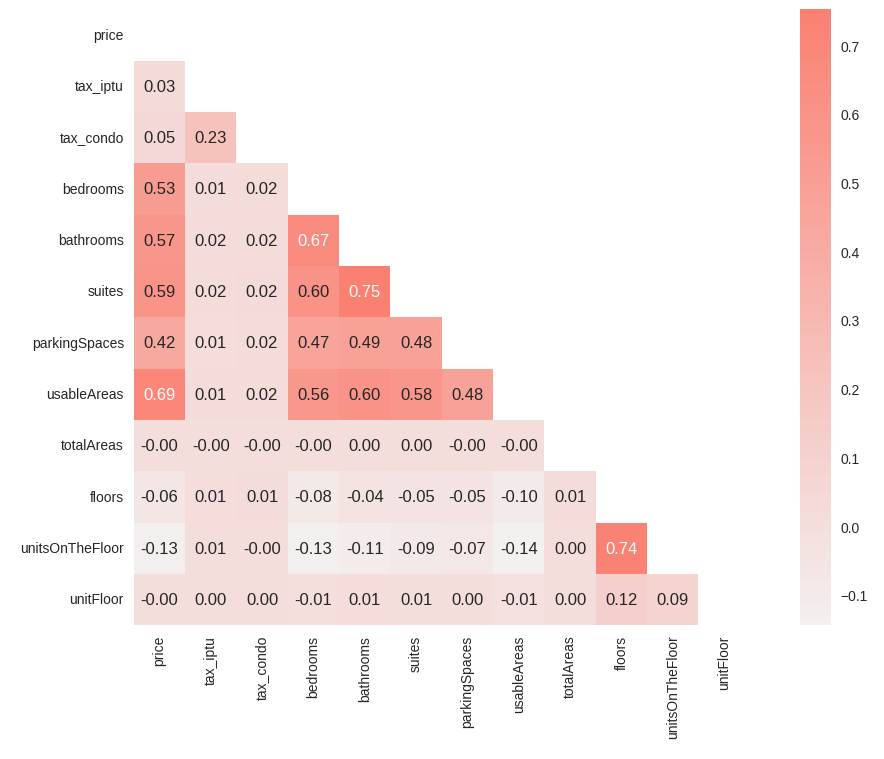

In [29]:
colors = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlations, cmap=colors, mask=mask, square=True, fmt='.2f', annot=True)

## Distribution

- Asymmetrical price data: more houses with low prices
- Small data about houses with high price

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Price')

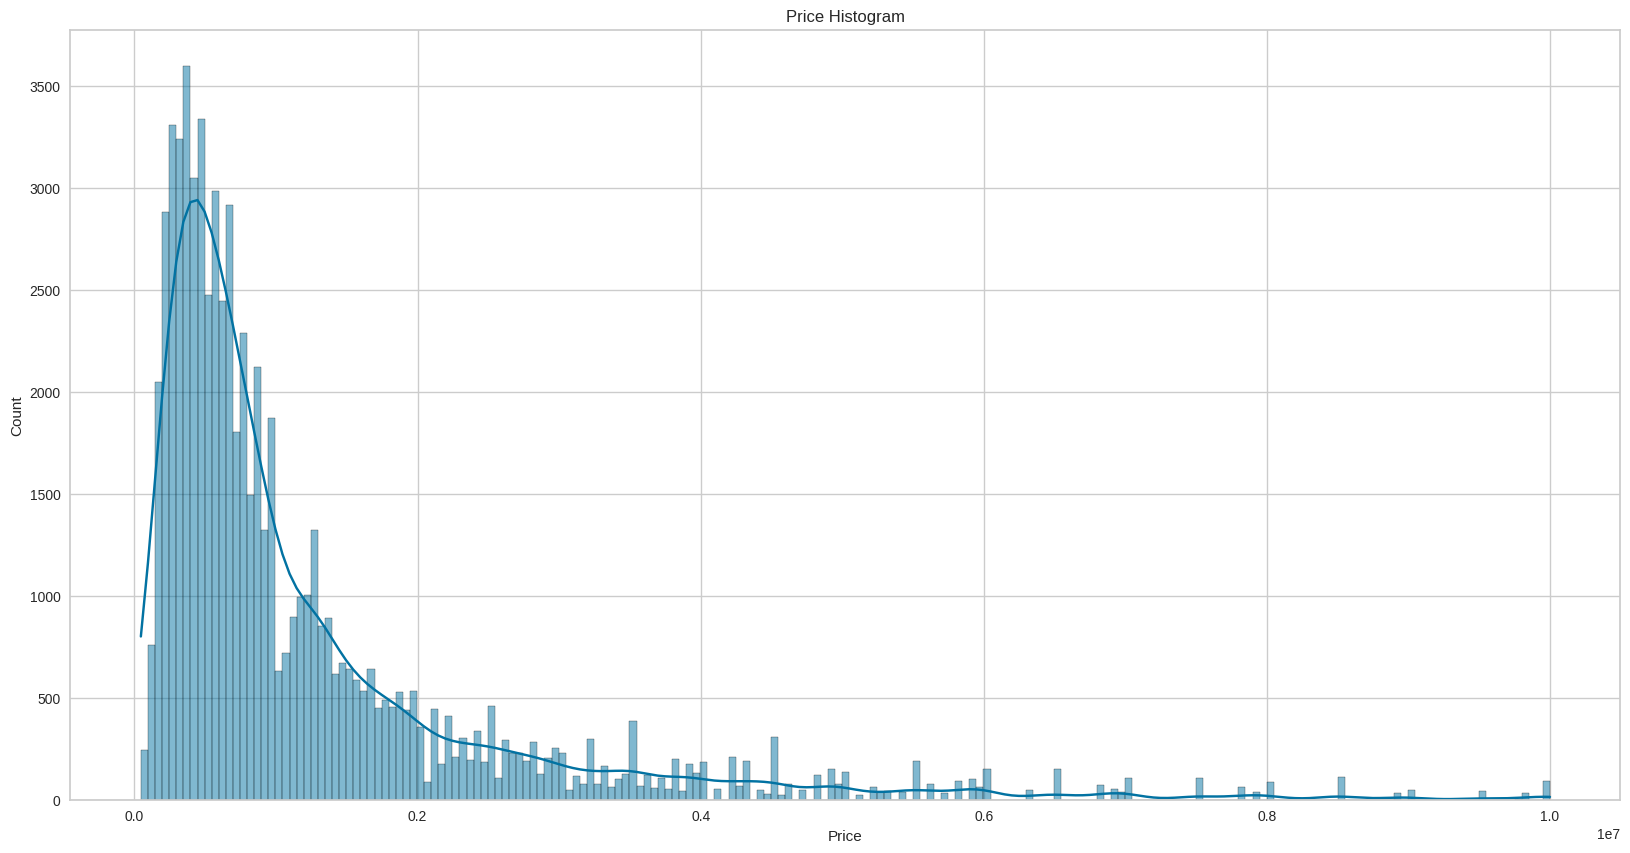

In [30]:
ax = sns.histplot(data=filtered_data, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Price Histogram')
ax.set_xlabel('Price')

### Variable Transformation

In [31]:
transformer = FunctionTransformer(np.log1p, validate=True)
transformed_data = transformer.transform(filtered_data.select_dtypes(exclude=['object']))
transformed_data

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


array([[10.71443999,  0.        ,  5.01727984, ...,  0.        ,
         0.        ,  0.        ],
       [10.71443999,  0.        ,  4.79579055, ...,  0.        ,
         0.        ,  0.        ],
       [10.81979828,  0.        ,  4.61512052, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [16.11809575,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [16.11809575, 10.46313191,  7.7836406 , ...,  0.        ,
         0.        ,  1.38629436],
       [16.11809575, 10.16589028,  7.49609735, ...,  1.38629436,
         0.69314718,  0.        ]])

In [32]:
transformed_data_columns = filtered_data.select_dtypes(exclude=['object']).columns
categorical_data = filtered_data.select_dtypes(include=['object'])
numerical_data = pd.DataFrame(transformed_data, columns=transformed_data_columns)
transformed_df = pd.concat([categorical_data, numerical_data], axis=1)
transformed_df

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Zona Oeste,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,Outros,Zona Oeste,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Zona Oeste,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,Outros,Zona Oeste,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69583,Casa,Zona Oeste,16.118096,7.972811,7.762596,1.791759,2.397895,0.693147,1.609438,6.932448,6.932448,0.000000,0.000000,0.000000
69584,Casa,Zona Oeste,16.118096,9.615872,8.006701,1.791759,2.079442,1.791759,1.945910,6.621406,7.131699,0.000000,0.000000,0.000000
69585,Apartamento,Zona Sul,16.118096,0.000000,0.000000,1.609438,1.791759,1.609438,1.386294,5.796058,5.796058,0.000000,0.000000,0.000000
69586,Casa,Zona Oeste,16.118096,10.463132,7.783641,1.791759,2.397895,1.791759,1.609438,6.932448,6.932448,0.000000,0.000000,1.386294


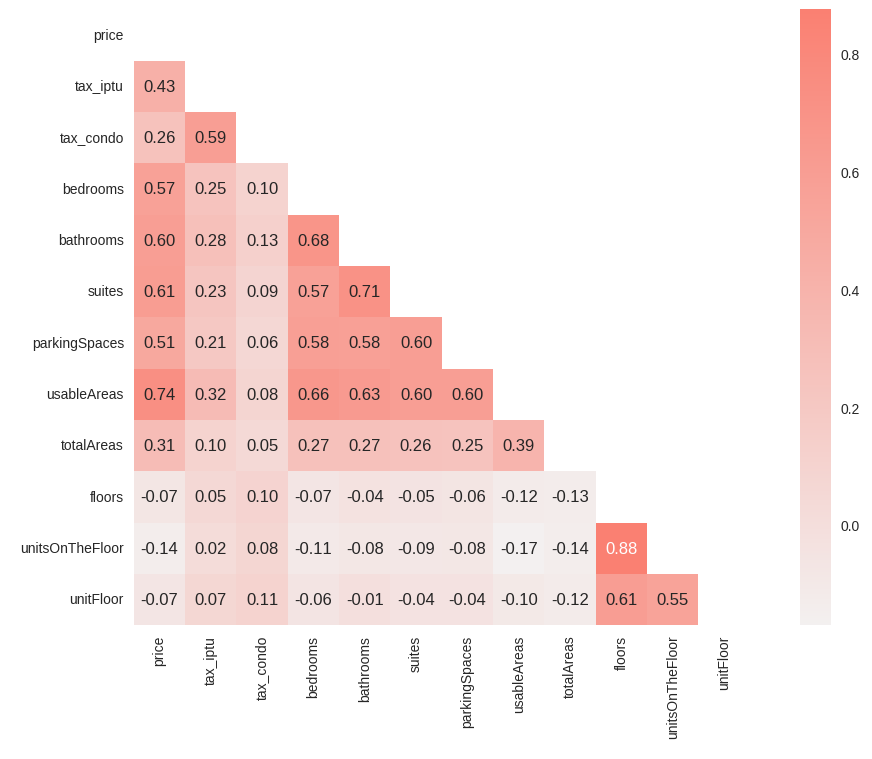

In [33]:
transformed_correlations = transformed_df.corr(numeric_only=True)

colors = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(transformed_correlations)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(transformed_correlations, cmap=colors, mask=mask, square=True, fmt='.2f', annot=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Price')

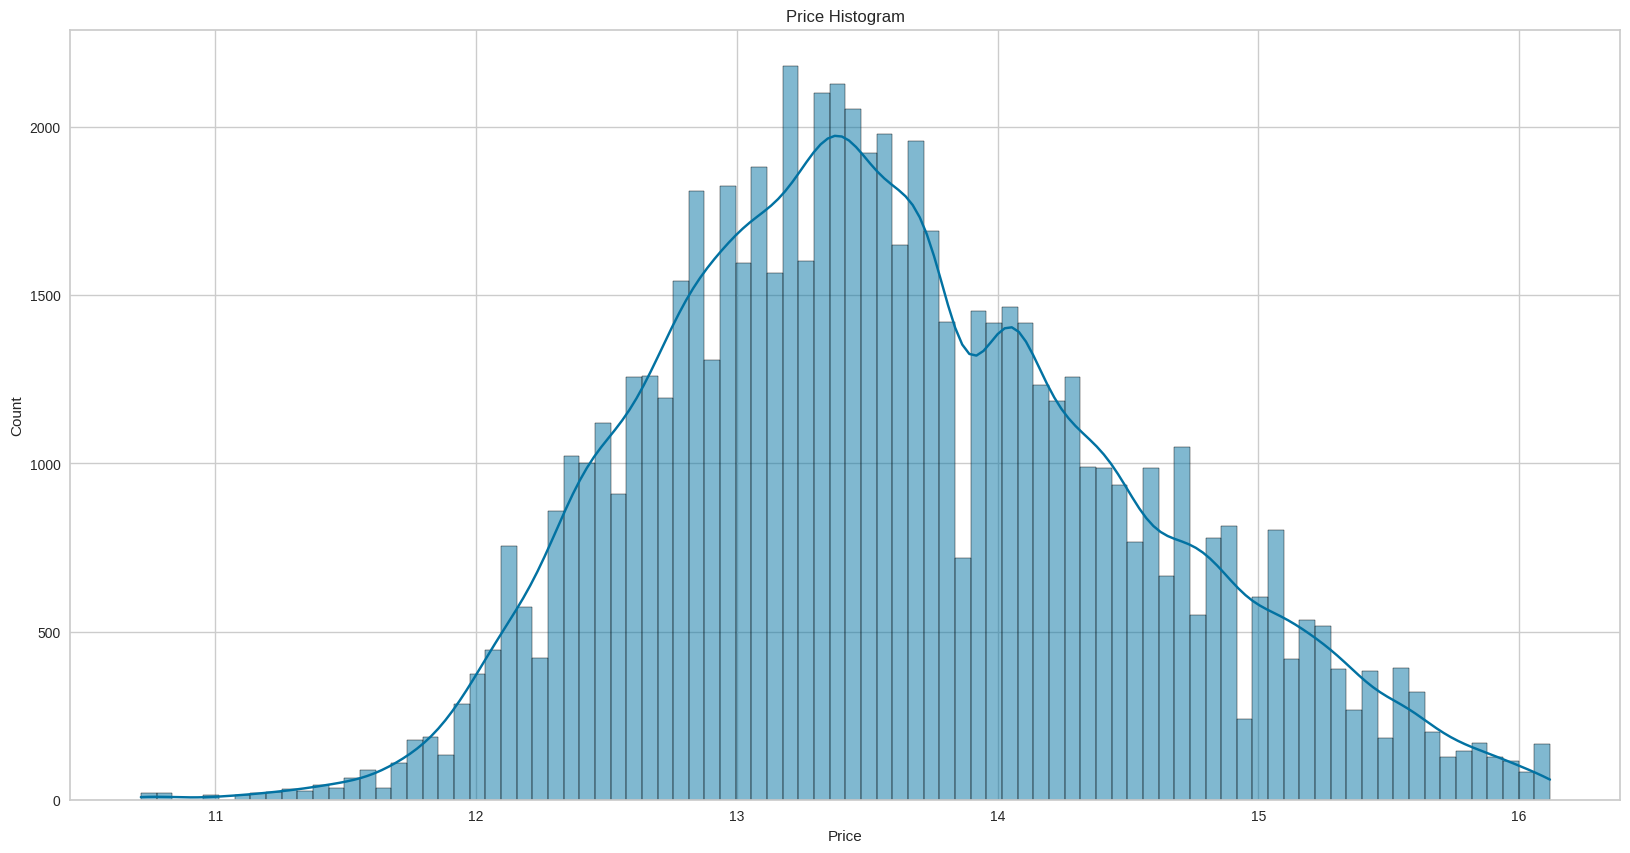

In [34]:
ax = sns.histplot(data=transformed_df, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Price Histogram')
ax.set_xlabel('Price')

### Dummies

In [35]:
categorical_data

,unit,zone
0,Outros,Zona Oeste
1,Apartamento,Zona Oeste
2,Outros,Zona Oeste
3,Apartamento,Zona Oeste
4,Outros,Zona Oeste
...,...,...
69583,Casa,Zona Oeste
69584,Casa,Zona Oeste
69585,Apartamento,Zona Sul
69586,Casa,Zona Oeste


In [36]:
categorical_data_columns = categorical_data.columns
categorical_data_columns

Index(['unit', 'zone'], dtype='object')

In [37]:
df_dummies = pd.get_dummies(transformed_df[categorical_data_columns], dtype=int)
df_dummies

,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,0,0,1,0,0,1,0
1,1,0,0,0,0,1,0
2,0,0,1,0,0,1,0
3,1,0,0,0,0,1,0
4,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...
69583,0,1,0,0,0,1,0
69584,0,1,0,0,0,1,0
69585,1,0,0,0,0,0,1
69586,0,1,0,0,0,1,0


In [38]:
dataframe = pd.concat([df_dummies, transformed_df.select_dtypes(exclude=['object'])], axis=1)
dataframe

,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,0,0,1,0,0,1,0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,1,0,0,0,0,1,0,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,0,0,1,0,0,1,0,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,1,0,0,0,0,1,0,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,0,0,1,0,0,1,0,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69583,0,1,0,0,0,1,0,16.118096,7.972811,7.762596,1.791759,2.397895,0.693147,1.609438,6.932448,6.932448,0.000000,0.000000,0.000000
69584,0,1,0,0,0,1,0,16.118096,9.615872,8.006701,1.791759,2.079442,1.791759,1.945910,6.621406,7.131699,0.000000,0.000000,0.000000
69585,1,0,0,0,0,0,1,16.118096,0.000000,0.000000,1.609438,1.791759,1.609438,1.386294,5.796058,5.796058,0.000000,0.000000,0.000000
69586,0,1,0,0,0,1,0,16.118096,10.463132,7.783641,1.791759,2.397895,1.791759,1.609438,6.932448,6.932448,0.000000,0.000000,1.386294


## Model Prediction

### Splitting Data

In [39]:
X = dataframe.drop('price', axis=1)
y = dataframe['price']

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [41]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(48711, 20877, 48711, 20877)

### Model

In [42]:
model = LinearRegression()

In [43]:
model.fit(X_train, Y_train)

LinearRegression()

In [44]:
prediction = model.predict(X_test)
prediction

array([13.18386841, 13.0977478 , 13.17593384, ..., 14.81974792,
       13.2298584 , 14.72232056])

## Performance Metrics

### Coefficient of determination (R²)

In [45]:
score = r2_score(Y_test, prediction)
score

0.7910322028910786

In [46]:
mean_absolute_error(Y_test, prediction)

0.31349944553151715

In [47]:
mean_squared_error(Y_test, prediction)

0.17162545799444973

## Decision Tree for Regression

### Model Prediction

In [48]:
tree_model = DecisionTreeRegressor(random_state=99, max_depth=5)

In [49]:
tree_model.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5, random_state=99)

In [50]:
prediction = tree_model.predict(X_test)
prediction

array([13.14457819, 13.14457819, 13.24158886, ..., 14.609253  ,
       13.45132456, 14.90083611])

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


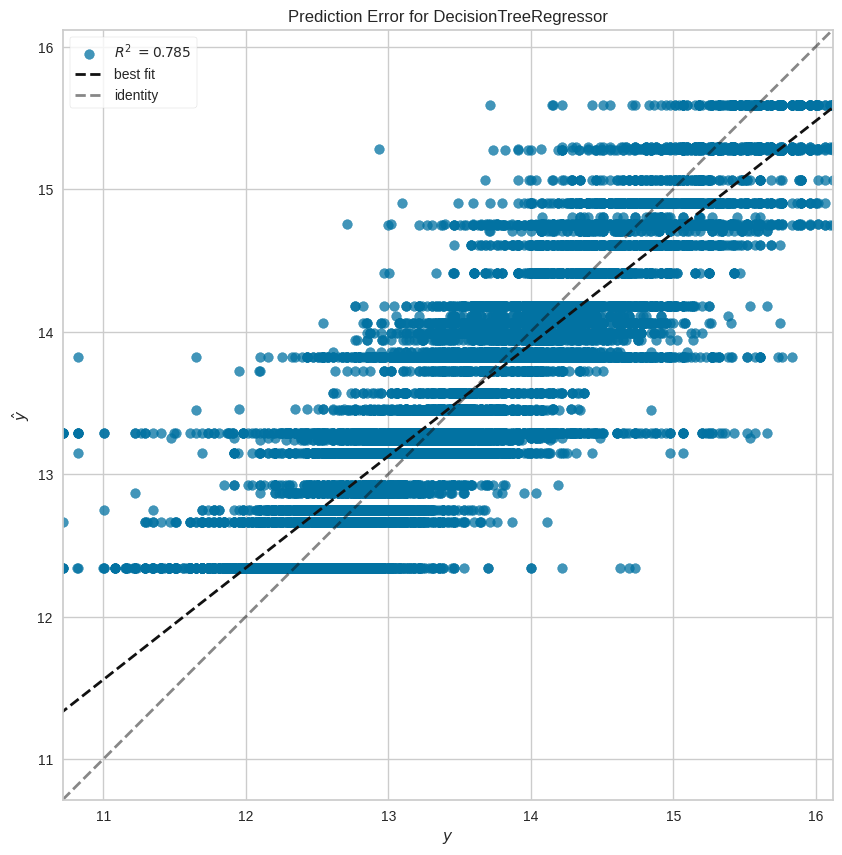

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [51]:
fix, ax = plt.subplots(figsize=(10, 10))
pred_error = PredictionError(tree_model)
pred_error.fit(X_train, Y_train)
pred_error.score(X_test, Y_test)
pred_error.poof()

### Performance Metric

In [52]:
r2 = r2_score(Y_test, prediction)
r2

0.7850374341563826

## Random Forest for Regression


### Model Prediction

In [53]:
forest = RandomForestRegressor(random_state=99, max_depth=5, n_estimators=10)

In [54]:
forest.fit(X_train, Y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=99)

In [55]:
prediction = forest.predict(X_test)
prediction

array([12.85310527, 13.16966457, 13.2273416 , ..., 14.49746394,
       13.46348996, 14.97362394])

### Error Prediction Graph

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


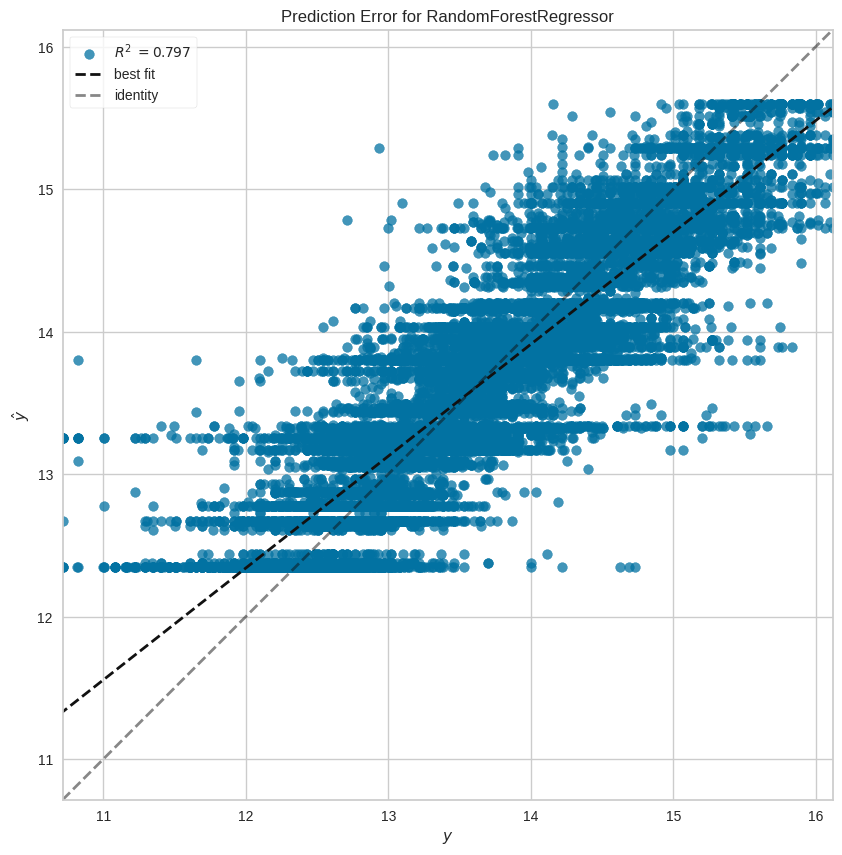

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [56]:
fix, ax = plt.subplots(figsize=(10, 10))
pred_error = PredictionError(forest)
pred_error.fit(X_train, Y_train)
pred_error.score(X_test, Y_test)
pred_error.poof()

### Performance Metrics

In [57]:
forest_r2 = r2_score(Y_test, prediction)
forest_r2

0.7968280303693938

## Optimization Techniques


## Optimizing Random Forest

In [58]:
cv = KFold(n_splits=5, shuffle=True)

### Cross validation


In [59]:
cross_val_r2 = cross_val_score(estimator=forest, X=X_train, y=Y_train, scoring='r2', cv=cv)
round(cross_val_r2.mean(), 3)

0.799

### Random Search Validação

In [60]:
random_parameters = {
    'n_estimators': [150, 200],
    'max_depth': [20, 30],
    'min_samples_split': [8, 10],
    'min_samples_leaf': [3],
}

In [61]:
forest_random_search_cv = RandomizedSearchCV(forest, random_parameters, n_iter=5, cv=cv, scoring='r2', n_jobs=1)

In [62]:
random_search_output = forest_random_search_cv.fit(X_train, Y_train)

In [63]:
pd.DataFrame(random_search_output.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,29.080987,0.105216,0.408873,0.009247,200,10,3,30,"{'n_estimators': 200, 'min_samples_split': 10,...",0.890313,0.893380,0.890045,0.895944,0.894883,0.892913,0.002378,2
1,21.941456,0.087399,0.311081,0.009834,150,10,3,30,"{'n_estimators': 150, 'min_samples_split': 10,...",0.890217,0.893232,0.890047,0.895759,0.894804,0.892812,0.002332,4
2,28.887622,0.089248,0.396364,0.002982,200,10,3,20,"{'n_estimators': 200, 'min_samples_split': 10,...",0.890252,0.893283,0.890019,0.895887,0.894786,0.892845,0.002363,3
3,22.432122,0.030316,0.321964,0.002870,150,8,3,30,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.890704,0.893481,0.890268,0.896116,0.895029,0.893119,0.002312,1
4,21.727737,0.101893,0.299776,0.002052,150,10,3,20,"{'n_estimators': 150, 'min_samples_split': 10,...",0.890162,0.893130,0.890036,0.895701,0.894732,0.892752,0.002317,5


In [64]:
random_search_output.best_params_

{'n_estimators': 150,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 30}

In [65]:
random_search_output.best_score_

0.8931194889938944

### Random Search Teste

In [66]:
forest = RandomForestRegressor(
    random_state=99,
    max_depth=30,
    n_estimators=200,
    min_samples_leaf=3,
    min_samples_split=8
)

In [67]:
forest.fit(X_train, Y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=200, random_state=99)

In [69]:
prediction = forest.predict(X_test)

In [70]:
r2_score(Y_test, prediction)

0.8972180696318814

## Optimizing Decision Tree

### Cross validation

In [71]:
cross_val_r2 = cross_val_score(estimator=tree_model, X=X_train, y=Y_train, scoring='r2', cv=cv)
round(cross_val_r2.mean(), 3)

0.785

### Random Search Validação

Definindo os parâmetros

In [72]:
random_parameters = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [6, 8, 10, 12, 14, 16],
    'min_samples_leaf': [6, 8, 10],
    'min_samples_split': [8, 10, 12, 16],
    'max_features': ['sqrt', 'log2', 'auto']
}

In [73]:
tree_random_search_cv = RandomizedSearchCV(tree_model, random_parameters, n_iter=5, cv=cv, scoring='r2', n_jobs=1)

In [74]:
tree_random_search_output = tree_random_search_cv.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.11/di

In [75]:
pd.DataFrame(tree_random_search_output.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.056191,0.005886,0.004220,0.000236,8,6,sqrt,12,squared_error,"{'min_samples_split': 8, 'min_samples_leaf': 6...",0.838382,0.837064,0.836708,0.828361,0.843947,0.836892,0.004997,4
1,12.852229,0.242868,0.004433,0.000475,10,8,sqrt,16,absolute_error,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.840743,0.840125,0.845724,0.831319,0.842498,0.840082,0.004794,2
2,12.866979,0.215068,0.004182,0.000077,16,8,log2,16,absolute_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",0.840743,0.840125,0.845724,0.831319,0.842498,0.840082,0.004794,2
3,0.194254,0.001261,0.004231,0.000047,8,10,auto,16,squared_error,"{'min_samples_split': 8, 'min_samples_leaf': 1...",0.862103,0.855986,0.865425,0.857394,0.872969,0.862775,0.006106,1
4,12.559837,0.123786,0.003716,0.000059,12,6,sqrt,10,absolute_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.814985,0.823795,0.833559,0.816478,0.829761,0.823716,0.007239,5


In [76]:
tree_random_search_output.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 16,
 'criterion': 'squared_error'}

In [77]:
tree_random_search_output.best_score_

0.8627753939809892

### Random Search Teste

In [78]:
tree = DecisionTreeRegressor(
    random_state=99,
    criterion='squared_error',
    max_depth=16,
    min_samples_leaf=10,
    min_samples_split=8,
    max_features='auto'
)

In [79]:
tree.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=16, max_features='auto', min_samples_leaf=10,
                      min_samples_split=8, random_state=99)

In [81]:
prediction = tree.predict(X_test)

In [82]:
r2_score(Y_test, prediction)

0.867179481818224